In [1]:
# https://www.kaggle.com/c/quora-question-pairs
# test.csv.zip, train.csv.zip
# 위 2개 파일을 data_in 폴더에 넣어서 학습

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

In [3]:
# data를 불러와보자

DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
train_data.info()

# 총 건수가 40만

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
print('전체 학습데이터', len(train_data))

전체 학습데이터 404290


In [6]:
# 실제 처리하기 전에 분석을 먼저 해야함.
# 각각의 컬럼에 지문이 2개 들어있음
# 일단 2개의 지문을 하나로 합칠 것

train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()
# question1, question2 있는걸 하나로 합친 것

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [7]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [8]:
train_set[404290]
# question2의 첫 질문이 일로 온 것.

'What is the step by step guide to invest in share market?'

In [9]:
train_set[404289]
# 이게 마지막 데이터

'What is like to have sex with cousin?'

In [10]:
# 2개 붙였기 떄문에 길이가 2배가 됨 -> 전체 길이 = 808580
print(len(train_set))

808580


In [11]:
# 훈련 데이터의 총 질문 수
print('훈련 데이터의 총 질문수: {}'.format(len(np.unique(train_set))))
# 중복 질문이 있다는 소리.

훈련 데이터의 총 질문수: 537361


In [12]:
print('중복 질문 수: {}'.format(np.sum(train_set.value_counts() > 1)))
# 111873 정도가 중복 질문(꽤 많음)

중복 질문 수: 111873


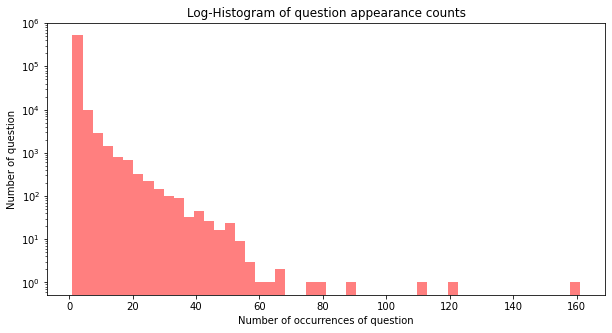

In [13]:
# 중복이 얼마나 되는지 히스토그램으로 그려보자
plt.figure(figsize=(10, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of question')
plt.show()

In [14]:
# 160번 이상 중복되는것도 있다는 소리
# 기본적으로 수십번씩 중복되는게 있음.
# 0 -> 중복이 없는 질문듯
# 50번 이하 중복이 가장 많고, 그 다음부터 중복이 급격히 떨어지고 있음

In [15]:
# 수치로 직접 뽑아보자
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복  평균: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간: {}'.format(np.median(train_set.value_counts())))
print('중복 1사분위: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('중복 3사분위: {}'.format(np.percentile(train_set.value_counts(), 75)))

# 어쨋든 중복이 많다...

중복 최대 개수: 161
중복 최소 개수: 1
중복  평균: 1.50
중복 표준편차: 1.91
중복 중간: 1.0
중복 1사분위: 1.0
중복 3사분위: 1.0


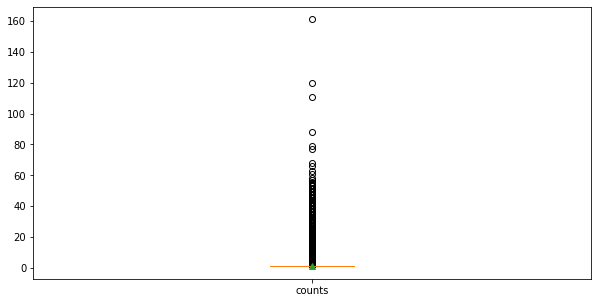

In [16]:
# 이 데이터를 박스플롯도 그려보자

plt.figure(figsize=(10, 5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)
plt.show()

In [17]:
# 아웃 라이어가 굉장히 심하게 많음 -> 아예 박스가 안그려지는 수준

In [18]:
# 실제 어떤 데이터가 분포되어 있는지, wordcloud로 그려보자

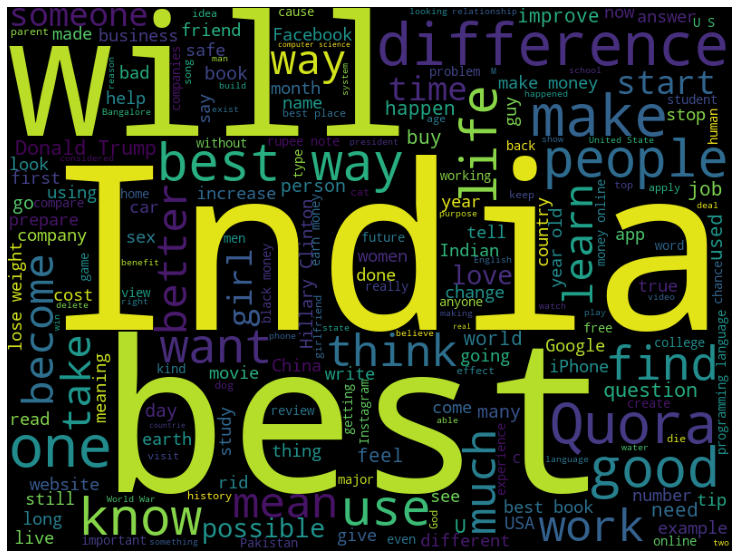

In [19]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
# 선거기간중 캐글에서 취합한 데이터 -> 라서 도날드 트럼프(Donald Trump)가 나옴

In [21]:
# 이즈 디플리케이트에 대해 공부해보자 -> duplicate로 보자

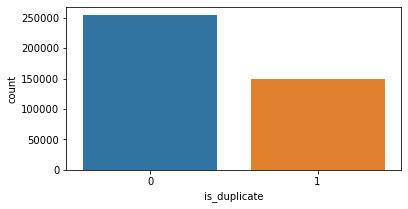

In [22]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['is_duplicate'])
plt.show()

In [23]:
# 40여만개중 중복이 아닌게 25만개정도(파란색), 중복인게 15만개 정도(주황색)

In [24]:
# label을 최대한 맞춰주고 할걸
# 일단 텍스트 길이 분석을 해보자

train_length = train_set.apply(len)

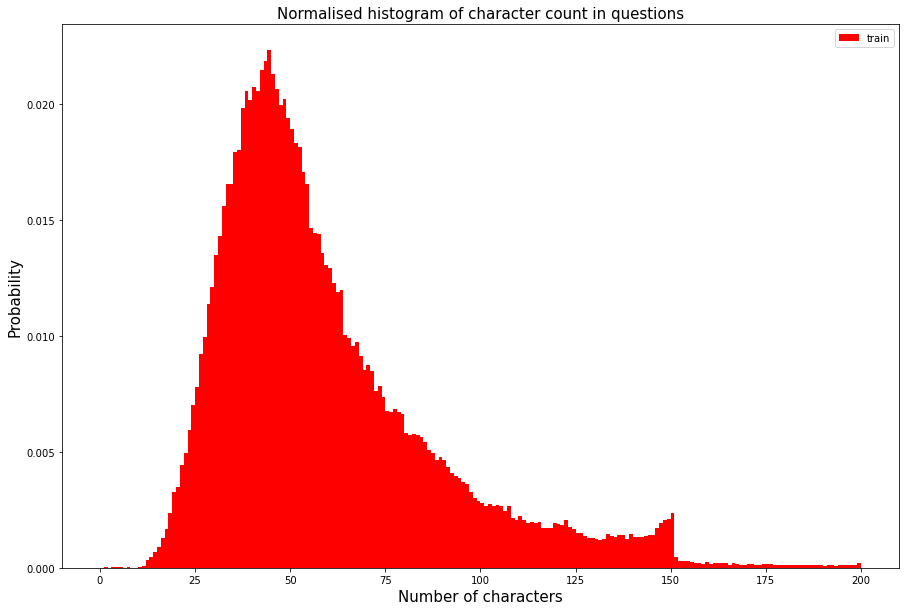

In [25]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [26]:
# 수치로 직접 뽑아보자
print('질문 최대 개수: {}'.format(np.max(train_length)))
print('질문 최소 개수: {}'.format(np.min(train_length)))
print('질문  평균: {:.2f}'.format(np.mean(train_length)))
print('질문 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 중간: {}'.format(np.median(train_length)))
print('질문 1사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 3사분위: {}'.format(np.percentile(train_length, 75)))

질문 최대 개수: 1169
질문 최소 개수: 1
질문  평균: 59.82
질문 표준편차: 31.96
질문 중간: 51.0
질문 1사분위: 39.0
질문 3사분위: 72.0


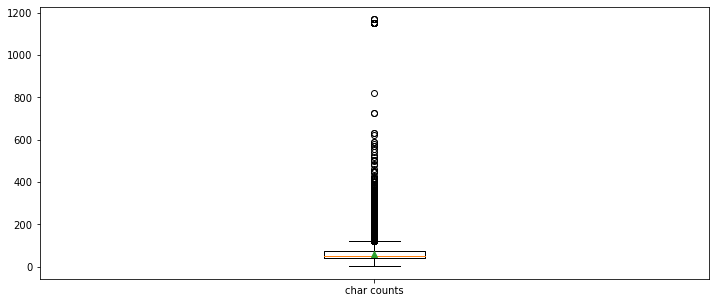

In [27]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)
plt.show()
# 여기까지 알파벳 수, character 기준으로 한 것

In [28]:
train_word_counts = train_set.apply(lambda x: len(x.split()))

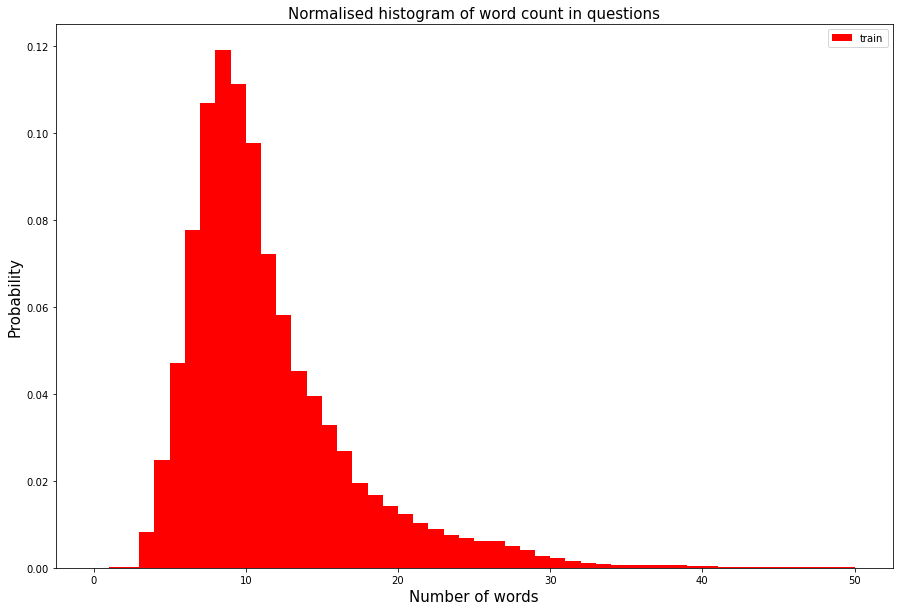

In [29]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [30]:
print('단어 최대 개수: {}'.format(np.max(train_word_counts)))
print('단어 최소 개수: {}'.format(np.min(train_word_counts)))
print('단어  평균: {:.2f}'.format(np.mean(train_word_counts)))
print('단어 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('단어 중간: {}'.format(np.median(train_word_counts)))
print('단어 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('단어 3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('단어 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

단어 최대 개수: 237
단어 최소 개수: 1
단어  평균: 11.06
단어 표준편차: 5.88
단어 중간: 10.0
단어 1사분위: 7.0
단어 3사분위: 13.0
단어 99 퍼센트: 31.0


In [31]:
# 전체 99퍼센트는 31개 단어로 되어있다는 것.

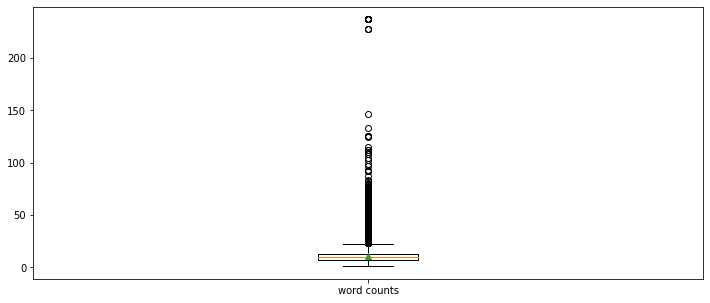

In [32]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, labels=['word counts'], showmeans=True)
plt.show()

In [33]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))  # ?가 들어있는 것
math = np.mean(train_set.apply(lambda x: '[math]' in x))    # 수학 기호가 들어있는 것 
# -> [math] -> 이러면 수학 기호 들어있는 놈을 찾아줌
fullstop = np.mean(train_set.apply(lambda x: '.' in x))  # . 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capital = np.mean(train_set.apply(lambda x: max(y.isupper() for y in x))) #  대문자로 되어있는게 몇개인가
numbers = np.mean(train_set.apply(lambda x: max(y.isdigit() for y in x)))# 숫자로 되어있는 질문이 몇개인가

print('물음표 질문:{:.2f}%'.format(qmarks * 100))
print('수학태그 질문:{:.2f}%'.format(math * 100))
print('마침표 질문:{:.2f}%'.format(fullstop * 100))
print('첫 글자 대문자 질문:{:.2f}%'.format(capital_first * 100))
print('대문자 포함 질문:{:.2f}%'.format(capital * 100))
print('숫자 포함 질문:{:.2f}%'.format(numbers * 100))

물음표 질문:99.87%
수학태그 질문:0.12%
마침표 질문:6.31%
첫 글자 대문자 질문:99.81%
대문자 포함 질문:99.95%
숫자 포함 질문:11.83%


In [34]:
# 물음표 날리고, 대문자 -> 소문자로 바꾸는 등
# 데이터 전처리 할것

In [35]:
import re
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
# 정규식으로 쓸 필터를 미리 만들자.

# FILTERS = r"([~.,!?\"':;])(])"  이래도 됨 
# FILTERS = r'([~.,!?"\':;])(])' 이거 안되서 바꿈
#2 바꾸고
FILTERS = r'[~.,!?"\':;]'

MAX_SEQUENCE_LENGTH = 31   
# 왜 31로 잡았을까 -> 전체 단어수로 했을때, 99%의 단어가 31%였으니까 -> 얘를 MAX로 잡은 것

#2 train data 다시 불러오고
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [39]:
# train_data =   <- train_data는 이미 했으니까 안해도 됨

# 얼추 맞춰줄것
train_pos_data = train_data.loc[train_data['is_duplicate'] ==1] # label 중복
train_neg_data = train_data.loc[train_data['is_duplicate'] ==0]  # 네가티브 data는 0으로
# 1, 0으로 분리했음.

class_difference = len(train_neg_data) - len(train_pos_data)   # 이걸 빼면 두 클래스의 차이가 나옴
sample_frac = 1 - (class_difference / len(train_neg_data))  # 1에서 두 클래스의 를 len(neg)로 나눈걸 빼줌
# 1에서 얘를 빼면 positive가 나옴

train_neg_data = train_neg_data.sample(frac=sample_frac)  # 이렇게 샘플링 함

# positive의 비율만 뽑겠다는 소리

In [40]:
# 해설

- 예를 들면, 중복이 아닌 것이 10,000 개, 중복인 것이 3,000 개일 경우
- 둘의 차이는 7,000개
- 위의 식으로 샘플 % 를 구하면 1 - (7,000 / 10,000) = 0.3
- 10,000 * 0.3 = 3,000 개

In [41]:
# 이렇게 처리하면 어떻게 되느냐
print('중복 질문: {}'.format(len(train_pos_data)))
print('중복 아닌 질문: {}'.format(len(train_neg_data)))

중복 질문: 149263
중복 아닌 질문: 149263


In [42]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [43]:
# 하나의 row에 질문이 2개씩 들어있음 -> 분리하겠다
# re(레귤러 익스프레스)에서 삭제하려는것 전부 삭제할거고.

# 아까 만들어 둔거
change_filter = re.compile(FILTERS)

question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

# 둘 다 정규식으로 필터링 할 것
# 일단 list를 만들고
filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub(change_filter, '', q).lower())  
    # 아까 조건에 맞는놈을 다 날려버리자 -> 그리고 소문자로 바꾸자.
    
for q in question2:
    filtered_question2.append(re.sub(change_filter, '', q).lower())  

In [44]:
# 하나만 찍어볼까
print(filtered_question1[:3])

['how can i download music in my iphone', 'is voice data streamed out of a google home or an amazon echo device before “alexa” or “hey google” is spoken', 'what is the best operating system for the pc in 2014']


In [45]:
# 샘플링때문에 나오는 단어는 다 다름

In [49]:
# 합쳐서 학습을 시킬것
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_question1 + filtered_question2)

In [51]:
# 단어 인덱스 구성
questions1_sequence = tokenizer.texts_to_sequences(filtered_question1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_question2)

In [52]:
# 제대로 됐는지 하나만 찍어봄
print(questions1_sequence[:3])

[[4, 13, 5, 338, 377, 8, 18, 202], [3, 1252, 220, 18521, 98, 10, 7, 135, 259, 26, 33, 656, 5989, 1030, 187, 45102, 26, 45103, 34071, 3, 1505], [2, 3, 1, 17, 1624, 201, 14, 1, 729, 8, 1409]]


In [53]:
# 페딩 처리
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [54]:
# 학습을 위한 전처리가 끝났으니, 저장
word_vocab = tokenizer.word_index

labels = np.array(train_data['is_duplicate'], dtype=int)

# 현재 상태
print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data: {}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print('Words in index: {}'.format(len(word_vocab)))

# sample 따로 뽑아낸거라서 사람마다 각자 문장이 다름 => 수치 조금씩 다름

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 76130


In [55]:
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)

In [57]:
# 저장
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), labels)
json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

# 파일 들어간거 확인 -> data_in / train_label.npy, train_q1.npy, train_q2.npy, data_configs.json

In [59]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
test_data.head()

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [60]:
test_data.info()
# -> 3563475  -> 컴퓨터가 생성한 가라데이터까지 돌렸다는것  (?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563475 entries, 0 to 3563474
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   test_id    object
 1   question1  object
 2   question2  object
dtypes: object(3)
memory usage: 81.6+ MB


In [62]:
# id 뽑아봄  (id 는 integer)
valid_ids = [type(x) == int for x in test_data.test_id]
print(len(valid_ids))

3563475


In [63]:
# test의 중복된 질문을 뺴버리면
test_data = test_data[valid_ids].drop_duplicates()
print(len(test_data))
# 이렇게 줄어듬

2345796


In [66]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]
# 각각 분류하고

# 둘 다 정규식으로 필터링 할 것
# 일단 list를 만들고
filtered_test_question1 = list()
filtered_test_question2 = list()

for q in test_question1:
    filtered_test_question1.append(re.sub(change_filter, '', q).lower())  
    # 아까 조건에 맞는놈을 다 날려버리자 -> 그리고 소문자로 바꾸자.
    
for q in test_question2:
    filtered_test_question2.append(re.sub(change_filter, '', q).lower())  

In [67]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)

# 페딩 처리
test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [68]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data: {}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

# 이건 숫자 맞아야함.
# 안맞으면 잘못된것.

Shape of question1 data: (2345796, 31)
Shape of question2 data: (2345796, 31)
Shape of ids: (2345796,)


In [69]:
# 숫자가 맞는걸 확인했으면
# 저장.

TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)

# 이렇게하면 data가 들어감
# 총 7개의 파일을 생성해서 저장했음

In [70]:
# 이 데이터를 갖고 모델링을 할 것.

In [ ]:
# 수업은 오늘 끝나지만,

In [ ]:
# 챗봇등 하려면
# 7장 참고하면 됨 (버트, GPT 모델 등)
# 7장은 활용부분